In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import geopandas as gpd
import fiona

In [163]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [11]:
floating_pop_time_201902 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_TIME_201902.csv', sep='|')
floating_pop_time_201903 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_TIME_201903.csv', sep='|')
floating_pop_time_201904 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_TIME_201904.csv', sep='|')
floating_pop_time_201905 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_TIME_201905.csv', sep='|')
floating_pop_time_202002 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_TIME_202002.csv', sep='|')
floating_pop_time_202003 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_TIME_202003.csv', sep='|')
floating_pop_time_202004 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_TIME_202004.csv', sep='|')
floating_pop_time_202005 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_TIME_202005.csv', sep='|')

floating_pop_age_201902 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201902.csv', sep='|')
floating_pop_age_201903 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201903.csv', sep='|')
floating_pop_age_201904 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201904.csv', sep='|')
floating_pop_age_201905 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201905.csv', sep='|')
floating_pop_age_202002 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202002.csv', sep='|')
floating_pop_age_202003 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202003.csv', sep='|')
floating_pop_age_202004 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202004.csv', sep='|')
floating_pop_age_202005 = pd.read_csv('01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202005.csv', sep='|')

In [5]:
plt.rcParams['font.family'] = "NanumGothic"
plt.rcParams['figure.figsize']=(10,10)

floating = gpd.read_file('01_유동인구데이터(SK텔레콤)/4개지역_행정동.shp')

In [219]:
floating_pop_age_202005.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,202005,20200501,1114052000,소공동,0.0,95.00,384.60,894.31,3052.13,6058.14,...,6552.96,5334.08,4514.50,4010.68,4560.64,4144.51,3703.35,3343.95,2344.84,2565.12
1,202005,20200502,1114052000,소공동,0.0,102.51,519.45,991.59,2848.75,5701.04,...,6176.08,4869.79,4050.83,3686.91,3903.81,3701.78,3315.39,3037.75,2131.23,2409.11
2,202005,20200503,1114052000,소공동,0.0,65.07,404.76,825.54,2316.44,4737.84,...,4935.84,3867.37,3160.31,2891.59,3085.93,2937.49,2401.29,2337.17,1543.97,1741.81
3,202005,20200504,1114052000,소공동,0.0,125.31,228.73,876.46,2987.22,7895.25,...,9625.69,8334.16,7450.33,6938.63,7217.70,6436.47,5302.17,4637.79,3070.52,3436.02
4,202005,20200505,1114052000,소공동,0.0,120.52,577.23,966.41,2455.45,5275.91,...,5536.17,4263.02,3622.03,3602.87,3770.89,3345.18,3201.69,2801.93,2005.99,2301.45


In [216]:
import math
math.trunc(sum(floating_pop_age_202005.iloc[0,4:])) == math.trunc(sum(floating_pop_time_202005.iloc[0,4:]))

True

# 시간대 별 EDA

In [36]:
f_time_2005 = floating_pop_time_202005.merge(floating[['HDONG_NM','SIDO_NM','SGNG_NM']], on ='HDONG_NM', how = 'left')
f_time_2005

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,SIDO_NM,SGNG_NM
0,202005,20200501,1114052000,소공동,1056.86,664.52,556.11,478.13,446.61,996.87,...,7835.67,7175.04,6583.44,5120.24,4160.91,3834.55,3439.90,2421.36,서울특별시,중구
1,202005,20200501,1114054000,회현동,1482.09,852.54,580.49,493.59,551.73,1416.35,...,12140.70,11116.52,8842.95,6849.94,5789.65,5427.94,4720.58,3320.95,서울특별시,중구
2,202005,20200501,1114055000,명동,1367.00,810.23,643.96,479.91,606.41,1100.50,...,9501.73,9864.65,9072.14,6508.48,5089.75,4679.15,4228.20,3109.33,서울특별시,중구
3,202005,20200501,1114057000,필동,523.31,385.25,309.38,268.92,261.42,443.34,...,5254.51,5507.19,5106.04,4147.62,3309.94,3355.86,2647.21,1585.57,서울특별시,중구
4,202005,20200501,1114058000,장충동,674.05,458.14,353.43,318.73,327.91,469.05,...,3792.48,3478.86,2943.61,2580.67,2196.28,2022.15,1567.25,1146.75,서울특별시,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,202005,20200531,2726066100,범물1동,598.19,402.80,293.56,208.36,194.74,293.63,...,2519.71,2341.32,2344.67,2002.38,1815.54,1398.37,996.67,592.60,대구광역시,수성구
2135,202005,20200531,2726066200,범물2동,860.02,797.33,714.27,645.72,635.94,680.46,...,1273.39,1262.05,1276.90,1255.39,1253.99,1139.82,1035.93,903.40,대구광역시,수성구
2136,202005,20200531,2726067000,고산1동,2934.21,2235.49,1632.46,1485.80,1279.89,1498.19,...,8484.01,8634.74,8781.90,8150.37,7550.56,6208.88,5092.64,3983.79,대구광역시,수성구
2137,202005,20200531,2726068000,고산2동,3332.81,2218.75,1566.97,1167.14,1132.96,1549.44,...,17122.82,16311.76,14701.17,13293.80,11671.12,9868.01,7015.46,4513.15,대구광역시,수성구


In [29]:
TMST_columns = []
for i in floating_pop_time_202005.columns:
    if 'TMST' in i:
        TMST_columns.append(i)

In [39]:
# 동 별 월 단위로 합치기 - mean 값
f_time_2005_mean = f_time_2005.groupby(['STD_YM','SIDO_NM','SGNG_NM','HDONG_NM'])[TMST_columns].mean().reset_index()
f_time_2005_mean

,STD_YM,SIDO_NM,SGNG_NM,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,202005,대구광역시,수성구,고산1동,2298.406452,1688.824194,1329.293871,1080.093226,982.034194,1298.681290,...,7015.309677,7141.708387,7694.415161,8690.472581,9454.505806,8394.326774,6566.192903,5576.370968,4629.110000,3402.907419
1,202005,대구광역시,수성구,고산2동,2933.887097,2008.616774,1538.181613,1189.756774,1164.611935,1934.793871,...,13552.595161,13985.705806,15156.981613,16296.634516,17235.781613,13938.720000,10476.365161,8839.608710,6806.601935,4578.896129
2,202005,대구광역시,수성구,고산3동,1170.685161,874.132258,677.861290,551.774194,512.194194,611.267742,...,2633.128387,2825.622581,2994.689032,3398.887742,3821.008710,3583.245484,2924.291935,2636.266129,2097.894516,1734.520000
3,202005,대구광역시,수성구,두산동,2073.770000,1652.049032,1377.600000,1141.770645,1084.192903,1278.746129,...,5316.100000,5329.213871,5506.792258,6066.970968,7018.234194,6721.390968,5491.618387,4631.487419,3656.383226,2666.544194
4,202005,대구광역시,수성구,만촌1동,1766.706774,1427.123871,1216.296129,1102.466129,1120.023548,1461.461290,...,5810.716452,6132.881613,6620.201613,6887.042903,7194.431290,5990.691290,4916.146774,4120.234839,3427.988387,2289.675806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,202005,서울특별시,중구,중림동,471.161290,306.622903,220.900000,174.732903,190.455161,369.508065,...,1768.738065,1857.859032,1953.630323,2200.872258,2876.997742,2174.017097,1577.075161,1443.634839,1322.437419,859.930323
65,202005,서울특별시,중구,청구동,385.244516,300.939032,251.495484,213.324516,208.378065,280.553226,...,1039.091613,1113.603871,1196.474516,1421.899032,1820.900645,1490.386129,1161.723871,1014.315806,967.828710,725.692903
66,202005,서울특별시,중구,필동,585.284516,435.946774,348.494194,309.204194,348.257419,607.553548,...,4992.557742,5189.644516,5228.921613,6233.199355,7688.016774,5375.505484,3652.726774,3442.320000,3136.771290,1854.890968
67,202005,서울특별시,중구,황학동,522.561935,331.032581,246.244194,203.805484,224.225806,407.740968,...,2389.330000,2516.174516,2582.247097,2969.725484,3862.702581,2878.885806,2130.787097,1876.127419,1593.593871,1317.286452


In [41]:
f_time_2005_mean['SIDOG'] = f_time_2005_mean[['SIDO_NM', 'SGNG_NM']].apply(lambda x: ' '.join(x), axis=1)
f_time_2005_mean

,STD_YM,SIDO_NM,SGNG_NM,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,SIDOG
0,202005,대구광역시,수성구,고산1동,2298.406452,1688.824194,1329.293871,1080.093226,982.034194,1298.681290,...,7141.708387,7694.415161,8690.472581,9454.505806,8394.326774,6566.192903,5576.370968,4629.110000,3402.907419,대구광역시 수성구
1,202005,대구광역시,수성구,고산2동,2933.887097,2008.616774,1538.181613,1189.756774,1164.611935,1934.793871,...,13985.705806,15156.981613,16296.634516,17235.781613,13938.720000,10476.365161,8839.608710,6806.601935,4578.896129,대구광역시 수성구
2,202005,대구광역시,수성구,고산3동,1170.685161,874.132258,677.861290,551.774194,512.194194,611.267742,...,2825.622581,2994.689032,3398.887742,3821.008710,3583.245484,2924.291935,2636.266129,2097.894516,1734.520000,대구광역시 수성구
3,202005,대구광역시,수성구,두산동,2073.770000,1652.049032,1377.600000,1141.770645,1084.192903,1278.746129,...,5329.213871,5506.792258,6066.970968,7018.234194,6721.390968,5491.618387,4631.487419,3656.383226,2666.544194,대구광역시 수성구
4,202005,대구광역시,수성구,만촌1동,1766.706774,1427.123871,1216.296129,1102.466129,1120.023548,1461.461290,...,6132.881613,6620.201613,6887.042903,7194.431290,5990.691290,4916.146774,4120.234839,3427.988387,2289.675806,대구광역시 수성구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,202005,서울특별시,중구,중림동,471.161290,306.622903,220.900000,174.732903,190.455161,369.508065,...,1857.859032,1953.630323,2200.872258,2876.997742,2174.017097,1577.075161,1443.634839,1322.437419,859.930323,서울특별시 중구
65,202005,서울특별시,중구,청구동,385.244516,300.939032,251.495484,213.324516,208.378065,280.553226,...,1113.603871,1196.474516,1421.899032,1820.900645,1490.386129,1161.723871,1014.315806,967.828710,725.692903,서울특별시 중구
66,202005,서울특별시,중구,필동,585.284516,435.946774,348.494194,309.204194,348.257419,607.553548,...,5189.644516,5228.921613,6233.199355,7688.016774,5375.505484,3652.726774,3442.320000,3136.771290,1854.890968,서울특별시 중구
67,202005,서울특별시,중구,황학동,522.561935,331.032581,246.244194,203.805484,224.225806,407.740968,...,2516.174516,2582.247097,2969.725484,3862.702581,2878.885806,2130.787097,1876.127419,1593.593871,1317.286452,서울특별시 중구


In [58]:
dae_su_median_2005 = f_time_2005_mean[f_time_2005_mean['SIDOG']=='대구광역시 수성구'].describe().median()
dae_jung_median_2005 = f_time_2005_mean[f_time_2005_mean['SIDOG']=='대구광역시 중구'].describe().median()
seo_no_median_2005 = f_time_2005_mean[f_time_2005_mean['SIDOG']=='서울특별시 노원구'].describe().median()
seo_jung_median_2005 = f_time_2005_mean[f_time_2005_mean['SIDOG']=='서울특별시 중구'].describe().median()

In [50]:
dae_su_median_2005[1:]

TMST_00     874.281129
TMST_01     645.668145
TMST_02     488.162258
TMST_03     383.990887
TMST_04     359.496302
TMST_05     466.906896
TMST_06     906.950440
TMST_07    1506.899557
TMST_08    2433.029328
TMST_09    2356.430726
TMST_10    2402.594594
TMST_11    2524.091681
TMST_12    2698.763282
TMST_13    2813.586855
TMST_14    2880.124677
TMST_15    3024.348952
TMST_16    3262.061532
TMST_17    3576.006774
TMST_18    3821.536694
TMST_19    3255.362097
TMST_20    2638.070000
TMST_21    2225.506532
TMST_22    1843.036210
TMST_23    1229.219355
dtype: float64

In [73]:
# 구 별 median으로 합치기
f_time_2005_mean.groupby(['SIDOG']).median().iloc[:,1:]

,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
SIDOG,,,,,,,,,,,,,,,,,,,,,
대구광역시 수성구,985.143548,742.038387,558.214194,452.394516,405.783548,499.285806,937.762258,1541.923871,2678.396774,2636.645806,...,3180.375806,3334.108065,3608.903871,3983.306452,4286.099355,3702.794839,3025.346774,2597.010323,2097.894516,1410.823226
대구광역시 중구,558.436613,445.246290,376.003871,321.781452,319.691774,447.155484,855.668226,1452.613548,2618.781452,2765.453065,...,2893.345323,2860.197258,2816.099194,2834.420323,2903.112097,1988.890484,1542.754839,1405.531935,1207.634677,890.338226
서울특별시 노원구,1274.910000,911.899355,627.934516,517.161290,568.275484,910.895484,1375.201935,2370.764839,3240.898710,2903.487097,...,3319.890323,3468.353871,3878.338387,4187.143548,4340.320968,3911.902258,3164.995161,2772.411290,2682.133226,1961.123548
서울특별시 중구,681.134516,463.125806,361.989355,318.234194,348.257419,607.553548,1489.689677,2804.644839,4470.514194,3736.558387,...,3797.023226,3808.974194,3838.736452,4109.674194,5403.823226,4337.531613,3106.892581,3023.617419,2588.793226,1810.441290


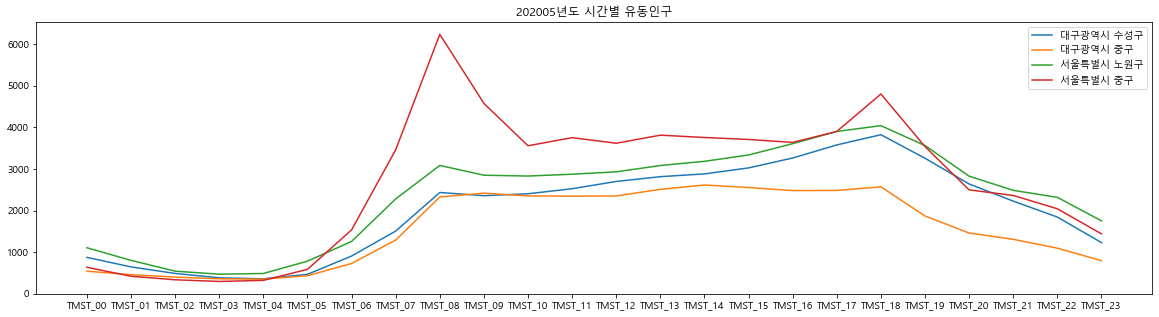

In [93]:
plt.figure(figsize=(20, 5))
sns.lineplot(x=TMST_columns, y=dae_su_median_2005[1:], label = '대구광역시 수성구')
sns.lineplot(x=TMST_columns, y=dae_jung_median_2005[1:], label = '대구광역시 중구')
sns.lineplot(x=TMST_columns, y=seo_no_median_2005[1:],label = '서울특별시 노원구')
sns.lineplot(x=TMST_columns, y=seo_jung_median_2005[1:],label = '서울특별시 중구')
plt.title('202005년도 시간별 유동인구')
plt.show()

In [67]:
def makelabel(df):
    df = df.merge(floating[['HDONG_NM','SIDO_NM','SGNG_NM']], on ='HDONG_NM', how = 'left')
    df = df.groupby(['STD_YM','SIDO_NM','SGNG_NM','HDONG_NM'])[TMST_columns].mean().reset_index()
    df['SIDOG'] = df[['SIDO_NM', 'SGNG_NM']].apply(lambda x: ' '.join(x), axis=1)
    return df

In [218]:
f_time_1902_mean = makelabel(floating_pop_time_201902)
f_time_1903_mean = makelabel(floating_pop_time_201903)
f_time_1904_mean = makelabel(floating_pop_time_201904)
f_time_1905_mean = makelabel(floating_pop_time_201905)
f_time_2002_mean = makelabel(floating_pop_time_202002)
f_time_2003_mean = makelabel(floating_pop_time_202003) 
f_time_2004_mean = makelabel(floating_pop_time_202004)

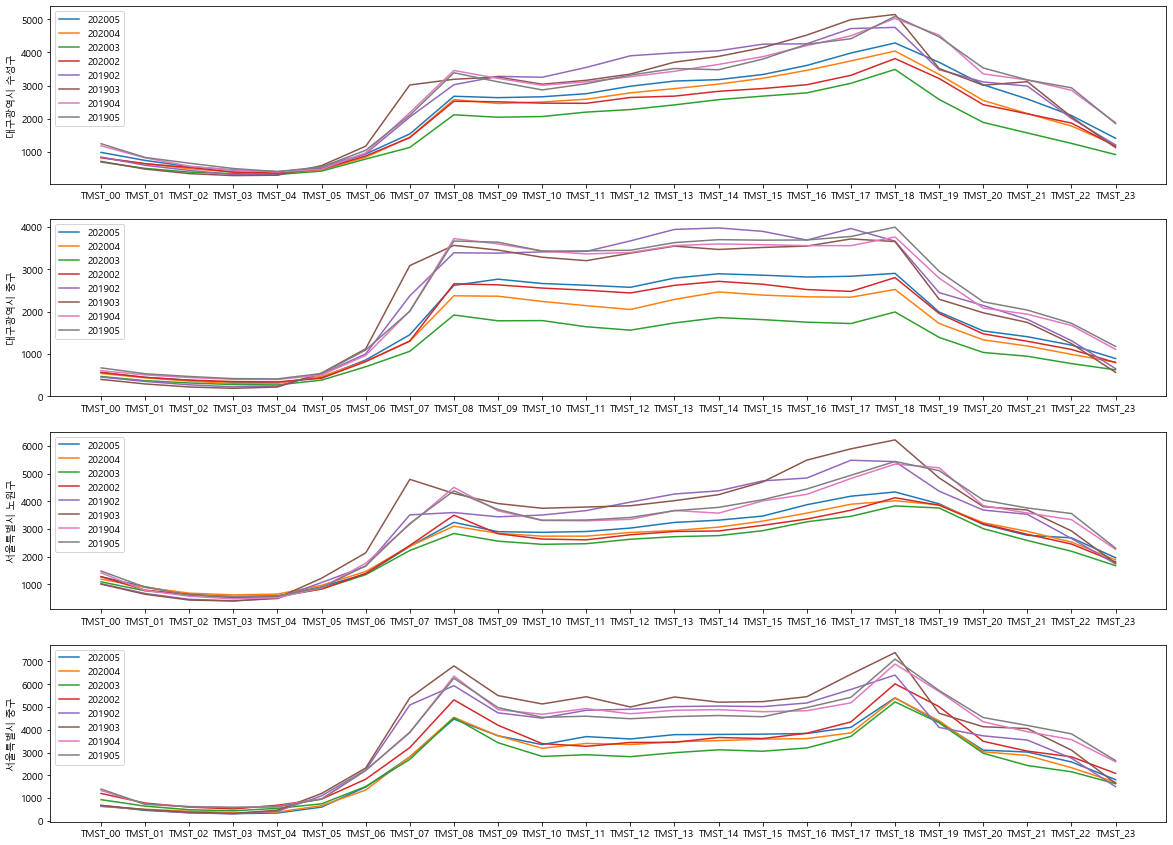

In [92]:
f, ax = plt.subplots(4, 1, figsize=(20, 15))
for i in range(4):
    sns.lineplot(x=TMST_columns,y=f_time_2005_mean.groupby(['SIDOG']).median().iloc[i,1:], label = 202005, ax=ax[i])
    sns.lineplot(x=TMST_columns,y=f_time_2004_mean.groupby(['SIDOG']).median().iloc[i,1:], label = 202004, ax=ax[i])
    sns.lineplot(x=TMST_columns,y=f_time_2003_mean.groupby(['SIDOG']).median().iloc[i,1:], label = 202003, ax=ax[i])
    sns.lineplot(x=TMST_columns,y=f_time_2002_mean.groupby(['SIDOG']).median().iloc[i,1:], label = 202002, ax=ax[i])
    sns.lineplot(x=TMST_columns,y=f_time_1902_mean.groupby(['SIDOG']).median().iloc[i,1:], label = 201902, ax=ax[i])
    sns.lineplot(x=TMST_columns,y=f_time_1903_mean.groupby(['SIDOG']).median().iloc[i,1:], label = 201903, ax=ax[i])
    sns.lineplot(x=TMST_columns,y=f_time_1904_mean.groupby(['SIDOG']).median().iloc[i,1:], label = 201904, ax=ax[i])
    sns.lineplot(x=TMST_columns,y=f_time_1905_mean.groupby(['SIDOG']).median().iloc[i,1:], label = 201905, ax=ax[i])
plt.show()

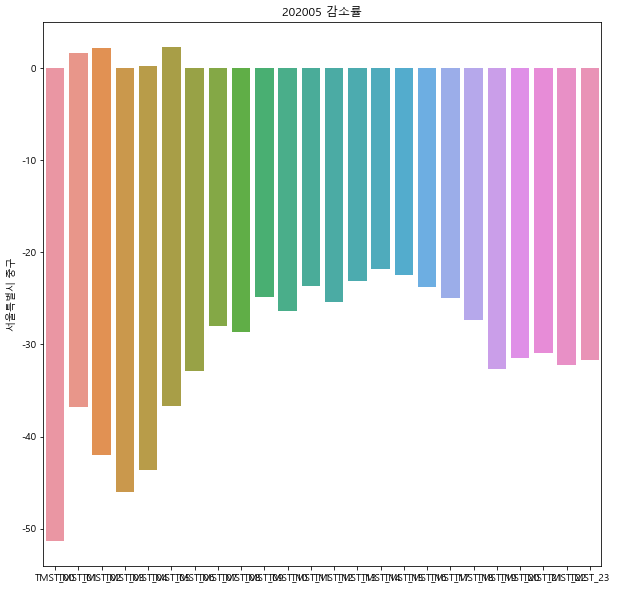

In [174]:
plt.subplots()
for i in range(4):
    sns.barplot(x=TMST_columns,y=((f_time_2005_mean.groupby(['SIDOG']).median().iloc[i,1:] - f_time_1905_mean.groupby(['SIDOG']).median().iloc[i,1:])/f_time_1905_mean.groupby(['SIDOG']).median().iloc[i,1:]) *100, label = 202005)
    plt.title('202005 감소률')
plt.show()

In [189]:
dicrease_2005 = np.zeros(shape=(24,4))
for i in range(4):
    dicrease_2005[:,i] = ((f_time_2005_mean.groupby(['SIDOG']).median().iloc[i,1:] - f_time_1905_mean.groupby(['SIDOG']).median().iloc[i,1:])/f_time_1905_mean.groupby(['SIDOG']).median().iloc[i,1:]) *100

dicrease_2005 = pd.DataFrame(dicrease_2005,columns=['대구광역시 수성구', '대구광역시 중구','서울특별시 노원구','서울특별시 중구'] )
dicrease_2005 


"f, ax = plt.subplots(2, 2, figsize=(20, 20))\nfor i in range(4):\n    sns.barplot(x=TMST_columns,y=dicrease_2005.iloc[:,i], label = 202005, ax = ax[i])\nplt.title('202005 증감률')\nplt.show()"

In [156]:
dicrease_2005

,대구광역시 수성구,대구광역시 중구,서울특별시 노원구,서울특별시 중구
0,-21.034947,-16.603712,-13.942159,-51.347703
1,-10.753766,-16.136712,1.624730,-36.737664
2,-15.295615,-19.349098,2.144535,-42.006394
3,-9.215828,-22.727125,-7.261829,-46.041527
4,0.220609,-22.068183,-2.108362,-43.638429
5,-8.559387,-16.761499,2.305906,-36.670953
6,-10.515756,-21.652993,-17.618270,-32.855035
7,-26.859896,-27.622539,-25.929488,-28.013734
8,-20.949445,-28.569945,-26.007500,-28.617529
9,-15.329153,-24.020847,-21.651081,-24.888433


In [170]:
dicrease_2005.describe()

,대구광역시 수성구,대구광역시 중구,서울특별시 노원구,서울특별시 중구
count,24.000000,24.000000,24.000000,24.000000
mean,-14.161153,-24.114642,-14.300466,-29.451483
std,6.673324,4.493823,8.824239,9.436788
min,-28.503722,-32.610469,-26.267182,-51.347703
25%,-17.432139,-27.394715,-21.678991,-33.809014
50%,-13.307151,-23.669289,-14.249646,-27.933590
75%,-9.813824,-21.996580,-11.485421,-23.629488
max,0.220609,-16.136712,2.305906,-16.716339


Text(0.5, 1.0, '19년도 5월 대비 20년도 5월 시간대별 유동인구 평균 증감률')

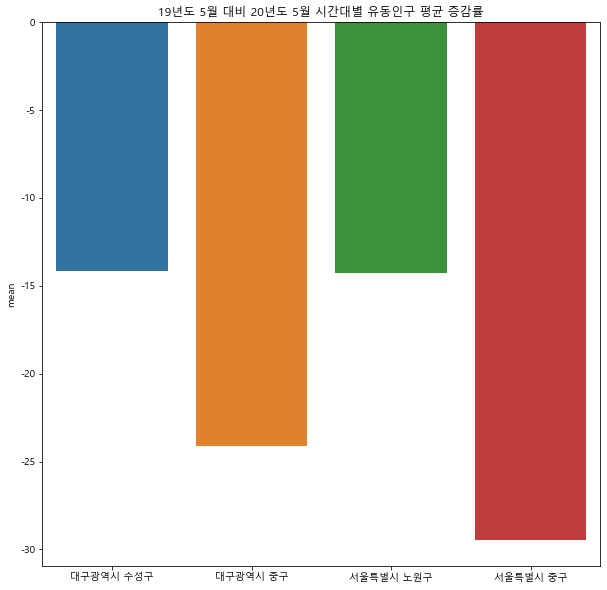

In [173]:
sns.barplot(x =dicrease_2005.describe().columns, y = dicrease_2005.describe().iloc[1,:])
plt.title('19년도 5월 대비 20년도 5월 시간대별 유동인구 평균 증감률')

In [175]:
dicrease_2004 = np.zeros(shape=(24,4))
for i in range(4):
    dicrease_2004[:,i] = ((f_time_2004_mean.groupby(['SIDOG']).median().iloc[i,1:] - f_time_1904_mean.groupby(['SIDOG']).median().iloc[i,1:])/f_time_1904_mean.groupby(['SIDOG']).median().iloc[i,1:]) *100
dicrease_2004 = pd.DataFrame(dicrease_2004,columns=['대구광역시 수성구', '대구광역시 중구','서울특별시 노원구','서울특별시 중구'] )

dicrease_2003 = np.zeros(shape=(24,4))
for i in range(4):
    dicrease_2003[:,i] = ((f_time_2003_mean.groupby(['SIDOG']).median().iloc[i,1:] - f_time_1903_mean.groupby(['SIDOG']).median().iloc[i,1:])/f_time_1903_mean.groupby(['SIDOG']).median().iloc[i,1:]) *100
dicrease_2003 = pd.DataFrame(dicrease_2003,columns=['대구광역시 수성구', '대구광역시 중구','서울특별시 노원구','서울특별시 중구'] )

dicrease_2002 = np.zeros(shape=(24,4))
for i in range(4):
    dicrease_2002[:,i] = ((f_time_2002_mean.groupby(['SIDOG']).median().iloc[i,1:] - f_time_1902_mean.groupby(['SIDOG']).median().iloc[i,1:])/f_time_1902_mean.groupby(['SIDOG']).median().iloc[i,1:]) *100
dicrease_2002 = pd.DataFrame(dicrease_2002,columns=['대구광역시 수성구', '대구광역시 중구','서울특별시 노원구','서울특별시 중구'] )


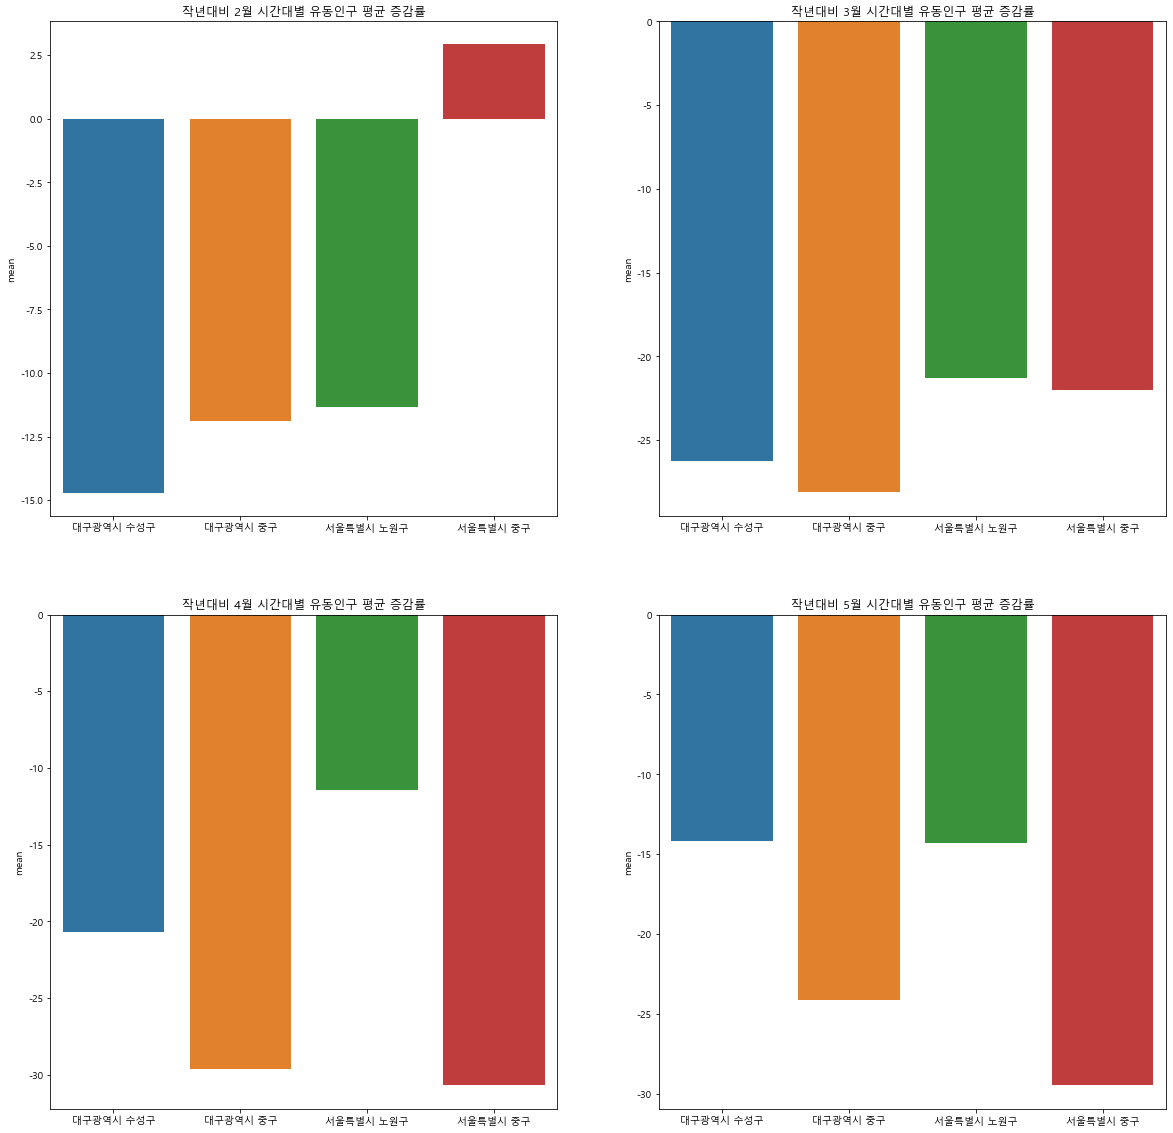

In [182]:
f, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.barplot(x =dicrease_2002.describe().columns, y = dicrease_2002.describe().iloc[1,:], ax=ax[0,0])
ax[0,0].set_title('작년대비 2월 시간대별 유동인구 평균 증감률')
sns.barplot(x =dicrease_2003.describe().columns, y = dicrease_2003.describe().iloc[1,:], ax=ax[0,1])
ax[0,1].set_title('작년대비 3월 시간대별 유동인구 평균 증감률')
sns.barplot(x =dicrease_2004.describe().columns, y = dicrease_2004.describe().iloc[1,:], ax=ax[1,0])
ax[1,0].set_title('작년대비 4월 시간대별 유동인구 평균 증감률')
sns.barplot(x =dicrease_2005.describe().columns, y = dicrease_2005.describe().iloc[1,:], ax=ax[1,1])
ax[1,1].set_title('작년대비 5월 시간대별 유동인구 평균 증감률')

plt.show()

In [190]:
dicrease_2002

,대구광역시 수성구,대구광역시 중구,서울특별시 노원구,서울특별시 중구
0,-1.642096,24.216892,24.864279,85.618962
1,8.019410,27.813753,18.318177,61.069561
2,20.390921,40.858350,37.089337,71.503864
3,22.568168,56.762198,36.579889,67.033078
4,16.147111,40.179449,19.827454,61.941686
5,-13.534551,-18.652881,-22.122657,-12.951636
6,-7.425464,-18.299077,-15.827591,-18.150764
7,-30.247761,-45.014434,-31.527631,-36.790520
8,-16.508641,-21.622889,-2.660162,-10.460658
9,-23.409410,-22.177469,-17.767561,-11.440359


In [193]:
dae_su = pd.DataFrame()
dae_su['2월'] = dicrease_2002['대구광역시 수성구']
dae_su['3월'] = dicrease_2003['대구광역시 수성구']
dae_su['4월'] = dicrease_2004['대구광역시 수성구']
dae_su['5월'] = dicrease_2005['대구광역시 수성구']

dae_jung = pd.DataFrame()
dae_jung['2월'] = dicrease_2002['대구광역시 중구']
dae_jung['3월'] = dicrease_2003['대구광역시 중구']
dae_jung['4월'] = dicrease_2004['대구광역시 중구']
dae_jung['5월'] = dicrease_2005['대구광역시 중구']

seo_no = pd.DataFrame()
seo_no['2월'] = dicrease_2002['서울특별시 노원구']
seo_no['3월'] = dicrease_2003['서울특별시 노원구']
seo_no['4월'] = dicrease_2004['서울특별시 노원구']
seo_no['5월'] = dicrease_2005['서울특별시 노원구']

seo_jung = pd.DataFrame()
seo_jung['2월'] = dicrease_2002['서울특별시 중구']
seo_jung['3월'] = dicrease_2003['서울특별시 중구']
seo_jung['4월'] = dicrease_2004['서울특별시 중구']
seo_jung['5월'] = dicrease_2005['서울특별시 중구']

In [196]:
seo_jung

,2월,3월,4월,5월
0,85.618962,36.541135,-52.549457,-51.347703
1,61.069561,31.085356,-30.439775,-36.737664
2,71.503864,27.742537,-32.202010,-42.006394
3,67.033078,35.661865,-39.228634,-46.041527
4,61.941686,17.117493,-38.682016,-43.638429
5,-12.951636,-37.648369,-30.934023,-36.670953
6,-18.150764,-35.049608,-38.830407,-32.855035
7,-36.790520,-50.027012,-27.112766,-28.013734
8,-10.460658,-33.401101,-28.513308,-28.617529
9,-11.440359,-37.599322,-23.523343,-24.888433


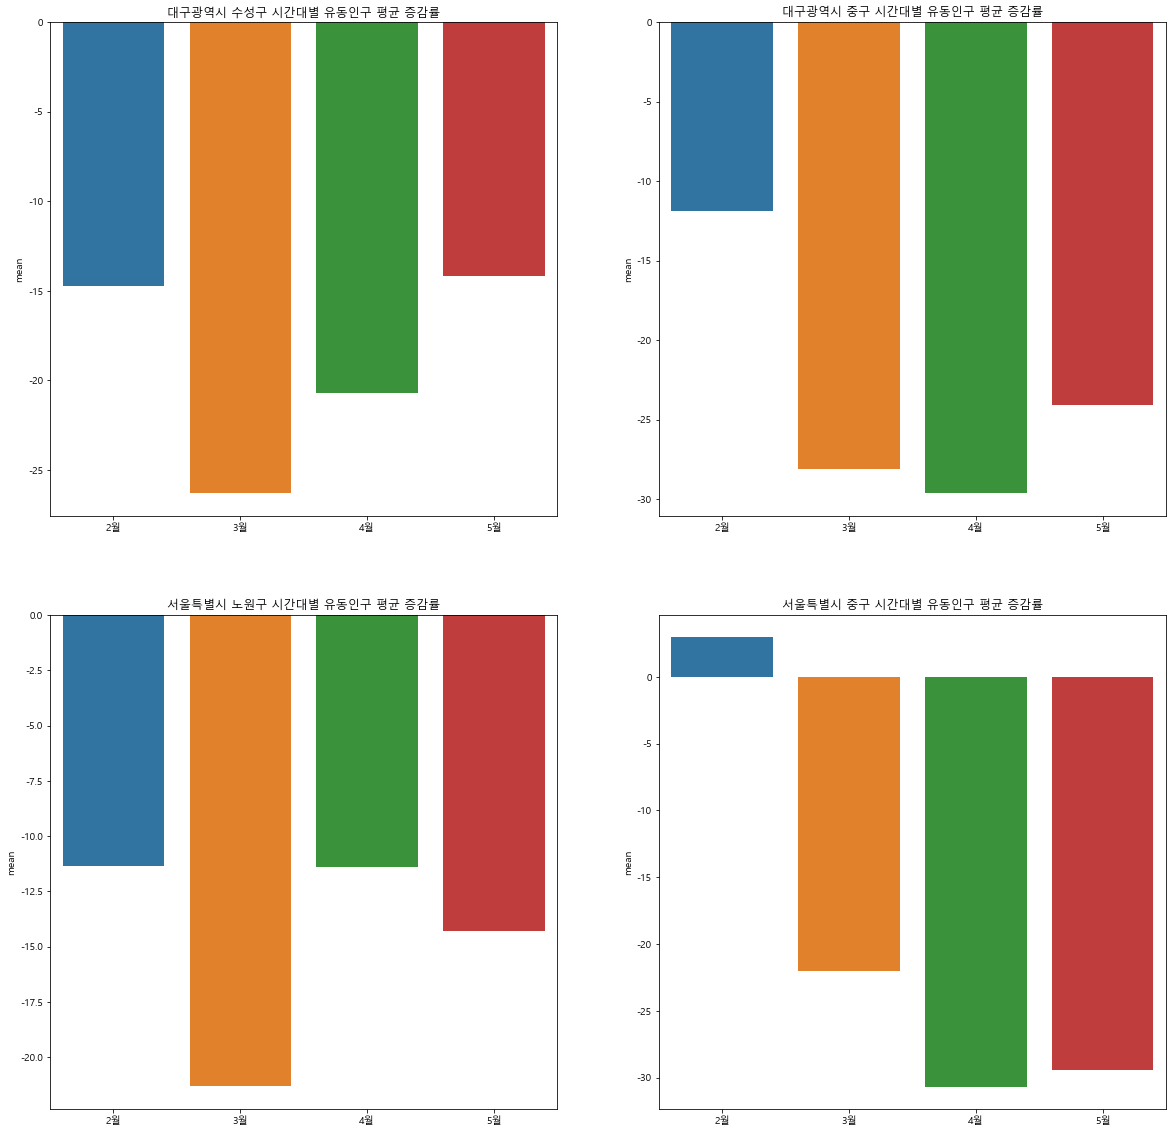

In [195]:
f, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.barplot(x =dae_su.columns, y = dae_su.describe().iloc[1,:], ax=ax[0,0])
ax[0,0].set_title('대구광역시 수성구 시간대별 유동인구 평균 증감률')
sns.barplot(x =dae_jung.columns, y = dae_jung.describe().iloc[1,:], ax=ax[0,1])
ax[0,1].set_title('대구광역시 중구 시간대별 유동인구 평균 증감률')
sns.barplot(x =seo_no.columns, y = seo_no.describe().iloc[1,:], ax=ax[1,0])
ax[1,0].set_title('서울특별시 노원구 시간대별 유동인구 평균 증감률')
sns.barplot(x =seo_jung.columns, y = seo_jung.describe().iloc[1,:], ax=ax[1,1])
ax[1,1].set_title('서울특별시 중구 시간대별 유동인구 평균 증감률')

plt.show()

In [186]:
dicrease_2005 = dicrease_2005.transpose()
dicrease_2005.columns = TMST_columns

In [197]:
dicrease_2004 = dicrease_2004.transpose()
dicrease_2004.columns = TMST_columns
dicrease_2003 = dicrease_2003.transpose()
dicrease_2003.columns = TMST_columns
dicrease_2002 = dicrease_2002.transpose()
dicrease_2002.columns = TMST_columns

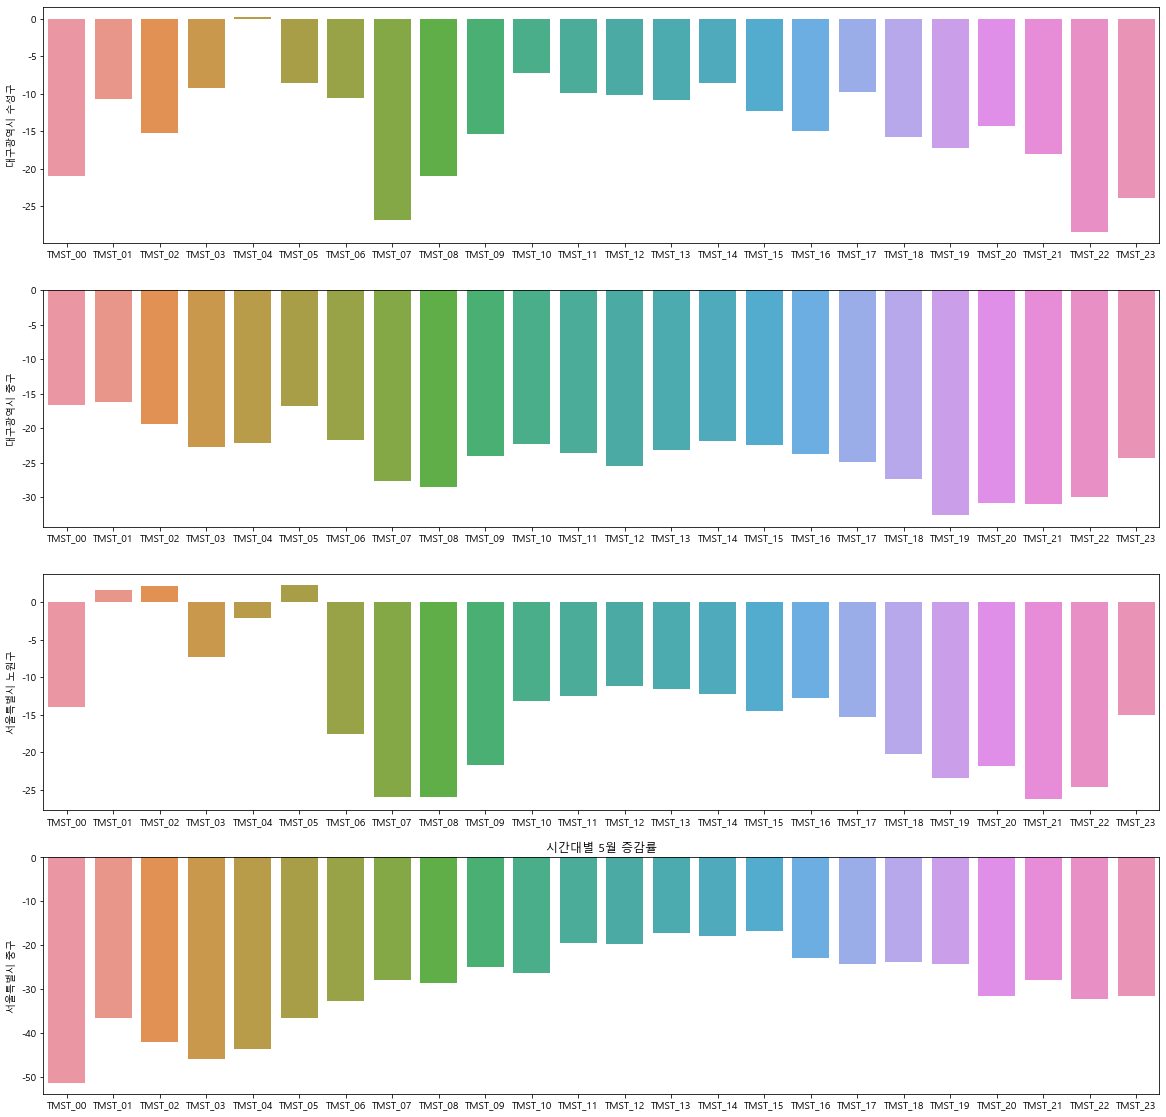

In [188]:
f, ax = plt.subplots(4,1, figsize=(20, 20))
for i in range(4):
    sns.barplot(x=dicrease_2005.columns,y=dicrease_2005.iloc[i,:], ax=ax[i])
plt.title('시간대별 5월 증감률')
plt.show()

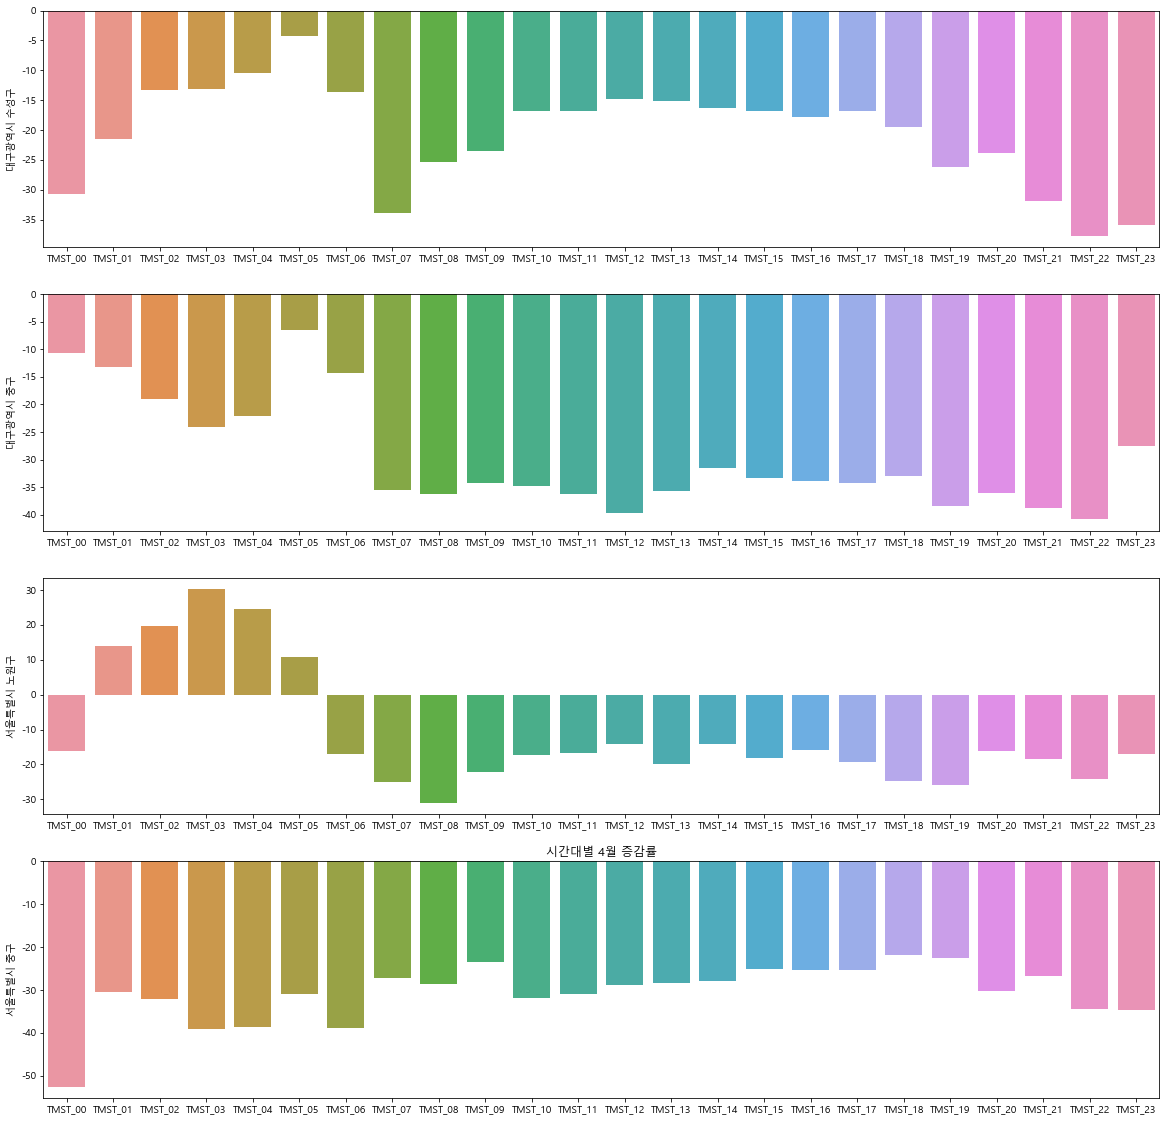

In [201]:
f, ax = plt.subplots(4,1, figsize=(20, 20))
for i in range(4):
    sns.barplot(x=dicrease_2004.columns,y=dicrease_2004.iloc[i,:], ax=ax[i])
plt.title('시간대별 4월 증감률')
plt.show()

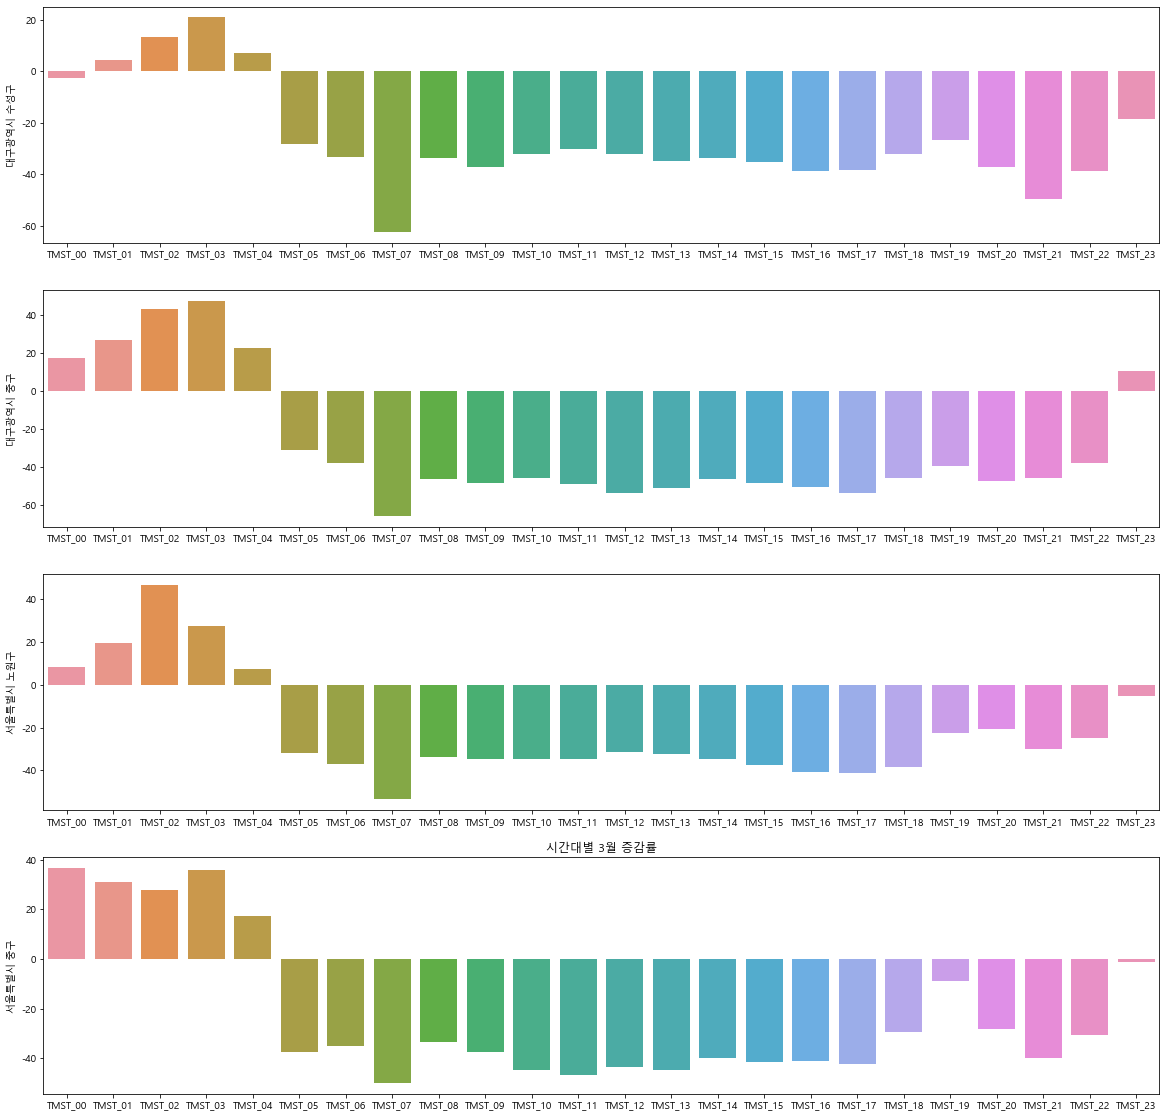

In [203]:
f, ax = plt.subplots(4,1, figsize=(20, 20))
for i in range(4):
    sns.barplot(x=dicrease_2003.columns,y=dicrease_2003.iloc[i,:], ax=ax[i])
plt.title('시간대별 3월 증감률')
plt.show()

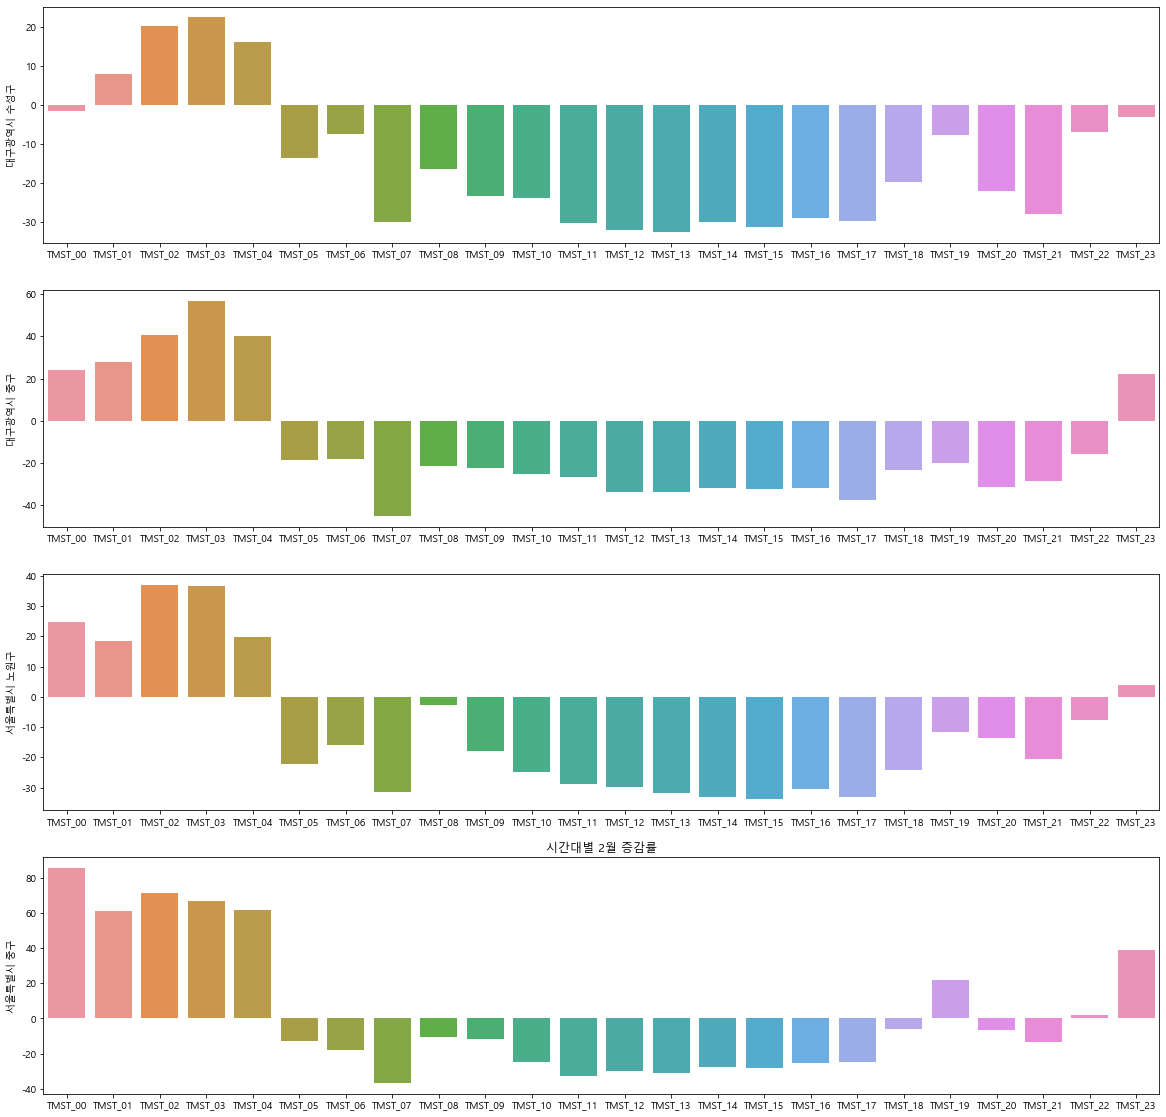

In [204]:
f, ax = plt.subplots(4,1, figsize=(20, 20))
for i in range(4):
    sns.barplot(x=dicrease_2002.columns,y=dicrease_2002.iloc[i,:], ax=ax[i])
plt.title('시간대별 2월 증감률')
plt.show()

# 나이대 별 EDA

In [220]:
CNT_columns = []
for i in floating_pop_age_201903.columns:
    if 'CNT' in i:
        CNT_columns.append(i)

def makelabel2(df):
    df = df.merge(floating[['HDONG_NM','SIDO_NM','SGNG_NM']], on ='HDONG_NM', how = 'left')
    df = df.groupby(['STD_YM','SIDO_NM','SGNG_NM','HDONG_NM'])[CNT_columns].mean().reset_index()
    df['SIDOG'] = df[['SIDO_NM', 'SGNG_NM']].apply(lambda x: ' '.join(x), axis=1)
    return df

f_age_1902_mean = makelabel2(floating_pop_age_201902)
f_age_1903_mean = makelabel2(floating_pop_age_201903)
f_age_1904_mean = makelabel2(floating_pop_age_201904)
f_age_1905_mean = makelabel2(floating_pop_age_201905)
f_age_2002_mean = makelabel2(floating_pop_age_202002)
f_age_2003_mean = makelabel2(floating_pop_age_202003)
f_age_2004_mean = makelabel2(floating_pop_age_202004)
f_age_2005_mean = makelabel2(floating_pop_age_202005)

In [224]:
f_age_2005_mean.groupby(['SIDOG']).median().iloc[:,1:16]

,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5054,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6064,MAN_FLOW_POP_CNT_6569,MAN_FLOW_POP_CNT_70U
SIDOG,,,,,,,,,,,,,,,
대구광역시 수성구,0.000000,104.746129,466.910968,1023.958387,1283.980000,1896.611290,2063.342258,2608.830323,3080.585484,3660.282903,3704.348710,3052.937419,2670.354839,1940.126129,2079.555161
대구광역시 중구,0.014032,69.848871,226.236613,577.048548,1257.967742,1704.446290,1581.951935,1896.678710,1910.336452,2192.888871,2275.916613,2341.678710,2307.294516,1750.155000,2019.245645
서울특별시 노원구,0.001290,100.276452,632.012581,1227.060968,1389.568710,2090.102903,2587.829677,3241.878387,3195.185806,3813.731290,3868.389032,3756.244516,3582.727742,2512.013548,2853.919032
서울특별시 중구,0.000000,35.987097,202.399032,614.628065,1576.168387,2870.119677,3357.713548,3936.871613,3681.469032,4160.939032,4144.355484,3765.890968,3556.624516,2527.092258,2714.155806


In [238]:
man = []
for i in f_age_2005_mean.groupby(['SIDOG']).median().columns:
    if 'WMAN' not in i and i != 'STD_YM':
        man.append(i[-4:-1])

woman = []
for i in f_age_2005_mean.groupby(['SIDOG']).median().columns:
    if 'WMAN' in i:
        woman.append(i)


In [247]:
for i in range(len(man)):
    man[i] = man[i][-4:]


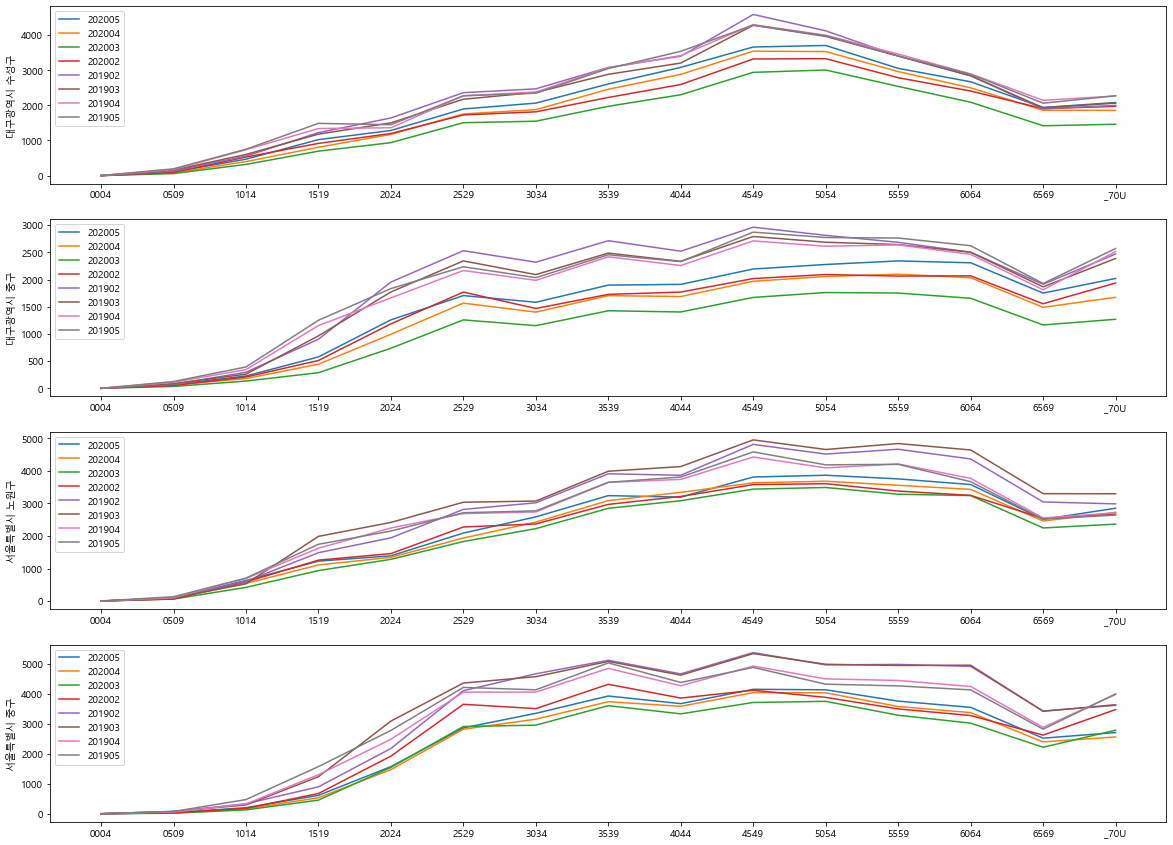

In [248]:
# 남성
f, ax = plt.subplots(4, 1, figsize=(20, 15))
for i in range(4):
    sns.lineplot(x=man,y=f_age_2005_mean.groupby(['SIDOG']).median().iloc[i,1:16], label = 202005, ax=ax[i])
    sns.lineplot(x=man,y=f_age_2004_mean.groupby(['SIDOG']).median().iloc[i,1:16], label = 202004, ax=ax[i])
    sns.lineplot(x=man,y=f_age_2003_mean.groupby(['SIDOG']).median().iloc[i,1:16], label = 202003, ax=ax[i])
    sns.lineplot(x=man,y=f_age_2002_mean.groupby(['SIDOG']).median().iloc[i,1:16], label = 202002, ax=ax[i])
    sns.lineplot(x=man,y=f_age_1902_mean.groupby(['SIDOG']).median().iloc[i,1:16], label = 201902, ax=ax[i])
    sns.lineplot(x=man,y=f_age_1903_mean.groupby(['SIDOG']).median().iloc[i,1:16], label = 201903, ax=ax[i])
    sns.lineplot(x=man,y=f_age_1904_mean.groupby(['SIDOG']).median().iloc[i,1:16], label = 201904, ax=ax[i])
    sns.lineplot(x=man,y=f_age_1905_mean.groupby(['SIDOG']).median().iloc[i,1:16], label = 201905, ax=ax[i])
plt.show()

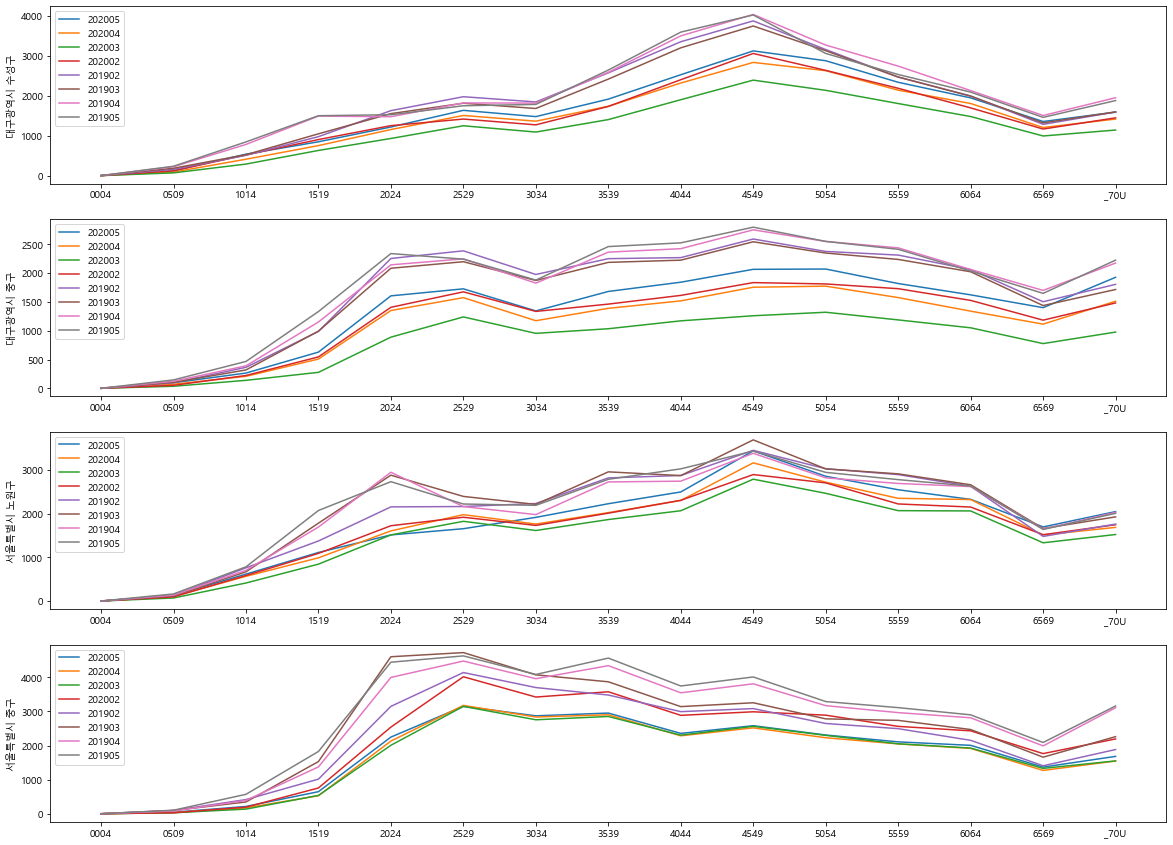

In [249]:
# 여성
f, ax = plt.subplots(4, 1, figsize=(20, 15))
for i in range(4):
    sns.lineplot(x=man,y=f_age_2005_mean.groupby(['SIDOG']).median().iloc[i,16:], label = 202005, ax=ax[i])
    sns.lineplot(x=man,y=f_age_2004_mean.groupby(['SIDOG']).median().iloc[i,16:], label = 202004, ax=ax[i])
    sns.lineplot(x=man,y=f_age_2003_mean.groupby(['SIDOG']).median().iloc[i,16:], label = 202003, ax=ax[i])
    sns.lineplot(x=man,y=f_age_2002_mean.groupby(['SIDOG']).median().iloc[i,16:], label = 202002, ax=ax[i])
    sns.lineplot(x=man,y=f_age_1902_mean.groupby(['SIDOG']).median().iloc[i,16:], label = 201902, ax=ax[i])
    sns.lineplot(x=man,y=f_age_1903_mean.groupby(['SIDOG']).median().iloc[i,16:], label = 201903, ax=ax[i])
    sns.lineplot(x=man,y=f_age_1904_mean.groupby(['SIDOG']).median().iloc[i,16:], label = 201904, ax=ax[i])
    sns.lineplot(x=man,y=f_age_1905_mean.groupby(['SIDOG']).median().iloc[i,16:], label = 201905, ax=ax[i])
plt.show()

> 산업군이나 코로나 질병에 여성, 남성, 나이 등의 메타 정보가 유의할 때 더 진행

# 상권분석

In [8]:
floating_seoul = floating[floating.SIDO_NM == '서울특별시']
floating_daegu = floating[floating.SIDO_NM == '대구광역시']


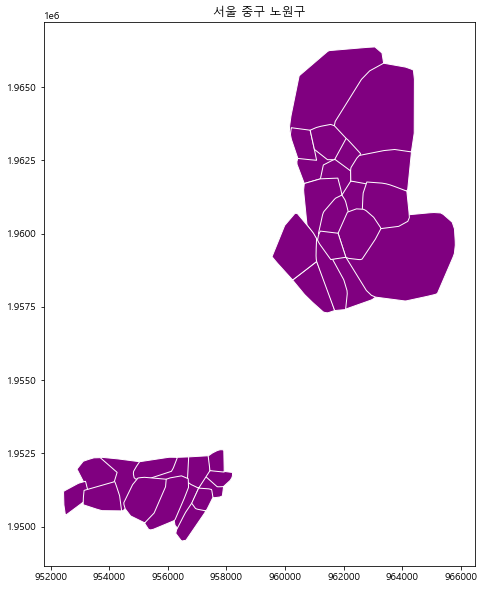

In [9]:
ax = floating_seoul.convex_hull.plot(color = 'purple', edgecolor = 'w')
ax.set_title('서울 중구 노원구')
plt.show()

In [76]:
import folium

In [79]:
m = folium.Map(location=[37.5502, 126.982], zoom_start=12)
folium.Marker(location=[37.5502, 126.982], popup="Marker A",
             icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker(location=[37.5411, 127.0107], popup="한남동",
             icon=folium.Icon(color='red')).add_to(m)
m